---
# Logistic Regression:

---

In [1]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 10.0)
import warnings
warnings.simplefilter("ignore")

# 1. Data Understanding, Cleaning and Transformation:

The dataset contains data of 1072 pokemons from generations 1 to 8. The dataset contains the overall stats of the pokemon along with the in detail stats of the pokemon. The dataset also contains the primary type of the pokemon along with the information if the pokemon is legendary or not. The dataset contains a total of 1072 rows and 11 columns.

Reading the dataset using `read_csv()` function from pandas.

In [2]:
data = pd.read_csv('Pokemon.csv')
dataset = data

Printing the top 5 and bottom 5 rows of the dataset. Using `head()` function of pandas to print the top section, while using `tail()` function of pandas to print the bottom section.

In [3]:
data.head()

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Grass,318,45,49,49,65,65,45,1,False
1,2,Grass,405,60,62,63,80,80,60,1,False
2,3,Grass,525,80,82,83,100,100,80,1,False
3,3,Grass,625,80,100,123,122,120,80,1,False
4,3,Grass,525,80,82,83,100,100,80,1,False


In [4]:
data.tail()

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896,Ice,580,100,145,130,65,110,30,8,True
1068,897,Ghost,580,100,65,60,145,80,130,8,True
1069,898,Psychic,500,100,80,80,80,80,80,8,True
1070,898,Psychic,680,100,165,150,85,130,50,8,True
1071,898,Psychic,680,100,85,80,165,100,150,8,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   type1       1072 non-null   object
 2   total       1072 non-null   int64 
 3   hp          1072 non-null   int64 
 4   attack      1072 non-null   int64 
 5   defense     1072 non-null   int64 
 6   sp_attack   1072 non-null   int64 
 7   sp_defense  1072 non-null   int64 
 8   speed       1072 non-null   int64 
 9   generation  1072 non-null   int64 
 10  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(1)
memory usage: 84.9+ KB


Checking the number of rows and columns in the dataset

In [6]:
data.shape

(1072, 11)

Checking for any null values in the dataset

In [7]:
data.isnull()

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1067,False,False,False,False,False,False,False,False,False,False,False
1068,False,False,False,False,False,False,False,False,False,False,False
1069,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

number        0
type1         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

Replacing False with binary 0 and True with binary 1

In [9]:
data["legendary"].replace({False:0,True:1})
data

,number,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Grass,318,45,49,49,65,65,45,1,False
1,2,Grass,405,60,62,63,80,80,60,1,False
2,3,Grass,525,80,82,83,100,100,80,1,False
3,3,Grass,625,80,100,123,122,120,80,1,False
4,3,Grass,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Ice,580,100,145,130,65,110,30,8,True
1068,897,Ghost,580,100,65,60,145,80,130,8,True
1069,898,Psychic,500,100,80,80,80,80,80,8,True
1070,898,Psychic,680,100,165,150,85,130,50,8,True


Dropping irrelvant columns

In [10]:
data.drop(["number"], axis=1, inplace=True)

In [11]:
data.drop(["generation"], axis=1, inplace=True)

In [12]:
data

,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,legendary
0,Grass,318,45,49,49,65,65,45,False
1,Grass,405,60,62,63,80,80,60,False
2,Grass,525,80,82,83,100,100,80,False
3,Grass,625,80,100,123,122,120,80,False
4,Grass,525,80,82,83,100,100,80,False
...,...,...,...,...,...,...,...,...,...
1067,Ice,580,100,145,130,65,110,30,True
1068,Ghost,580,100,65,60,145,80,130,True
1069,Psychic,500,100,80,80,80,80,80,True
1070,Psychic,680,100,165,150,85,130,50,True


# 2. Data Analysis and Visualization:

Figure representation based on primary type

Text(0, 0.5, 'Number of Pokemon')

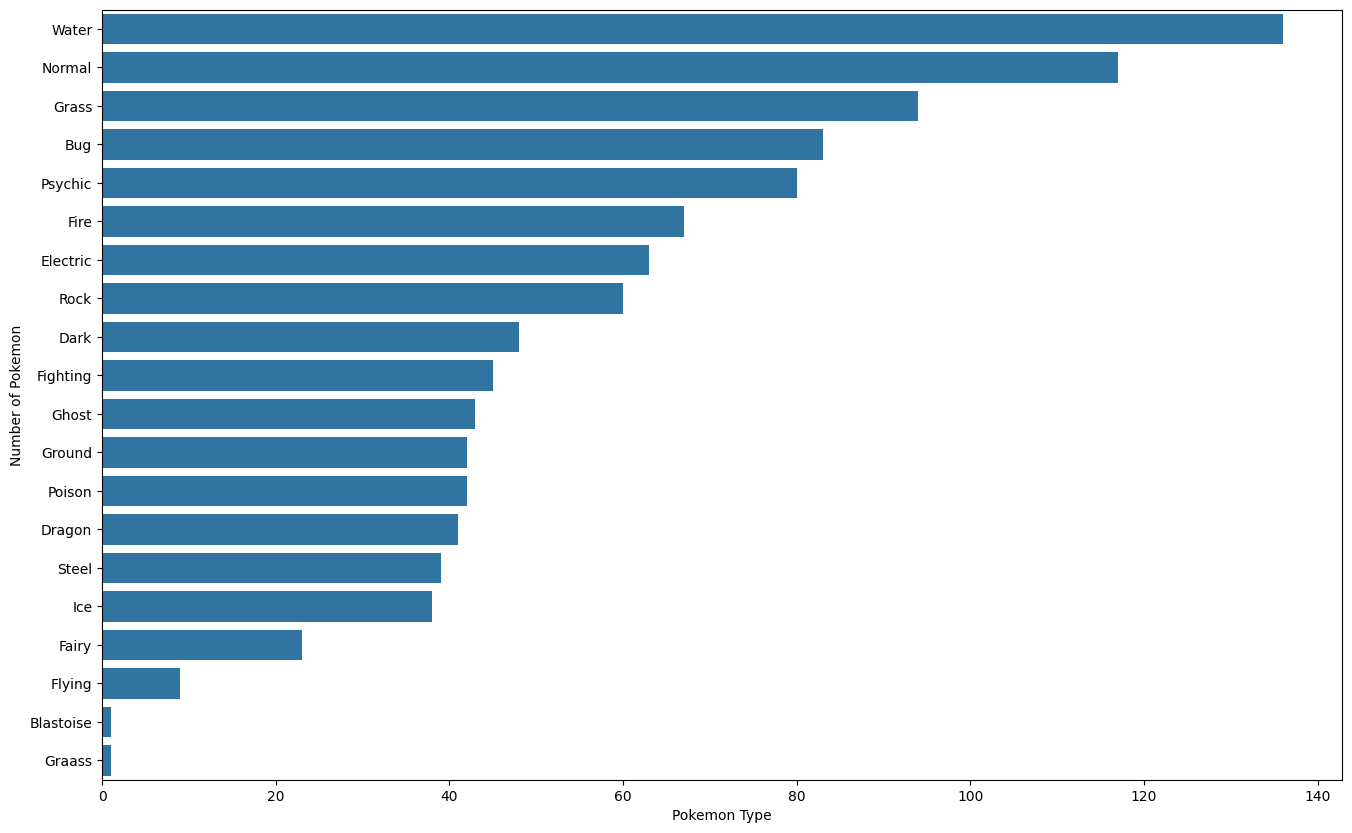

In [13]:
plt.figure(figsize=(16, 10))
sns.countplot(y=data["type1"], order = data["type1"].value_counts().index)
plt.xlabel("Pokemon Type")
plt.ylabel("Number of Pokemon")

Figure representation based on Legendary or Not Legendary

Text(0, 0.5, 'Number of Pokemon')

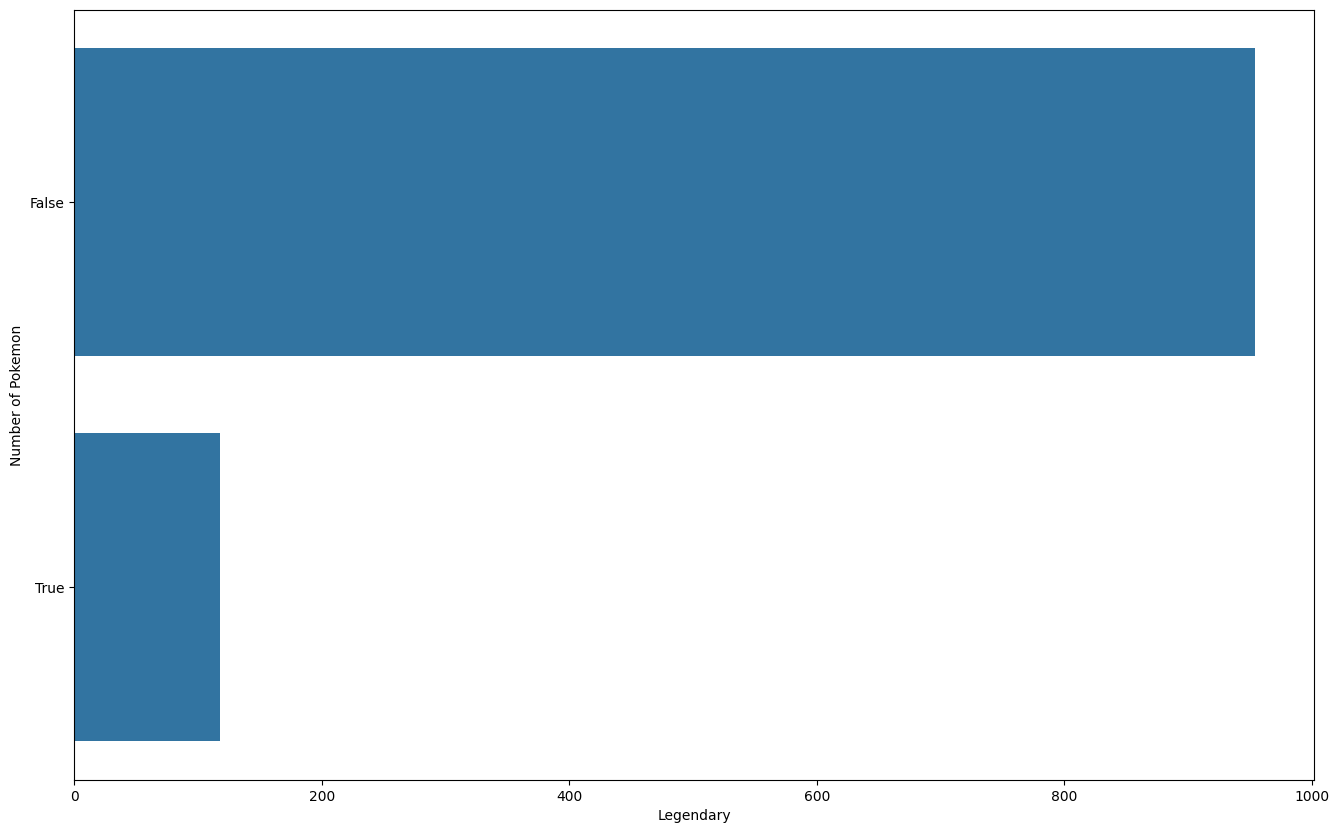

In [14]:
plt.figure(figsize=(16, 10))
sns.countplot(y=data["legendary"], order = data["legendary"].value_counts().index)
plt.xlabel("Legendary")
plt.ylabel("Number of Pokemon")

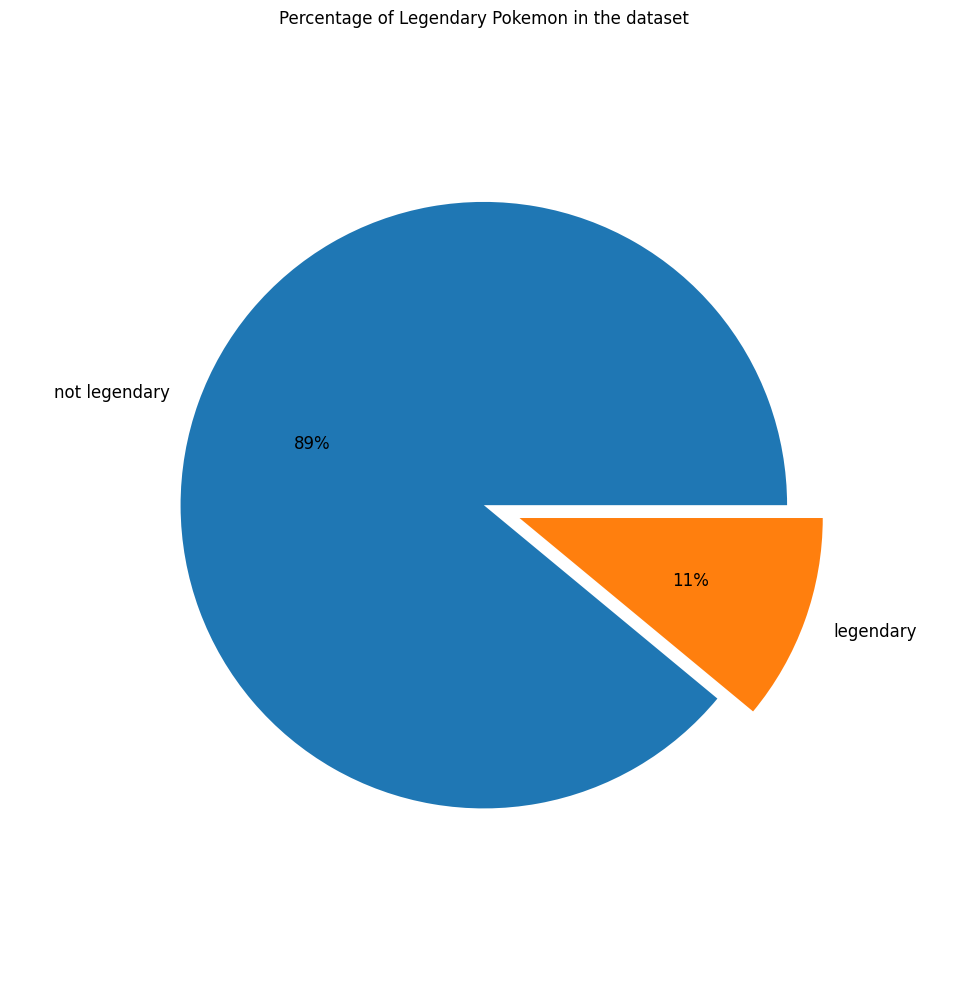

In [15]:
plt.pie(data["legendary"].value_counts(), labels = ["not legendary", "legendary"],radius = 0.8, autopct = "%.0f%%",explode=(0,0.1),textprops={'fontsize': 12})
plt.title("Percentage of Legendary Pokemon in the dataset",fontsize=12)
plt.tight_layout()

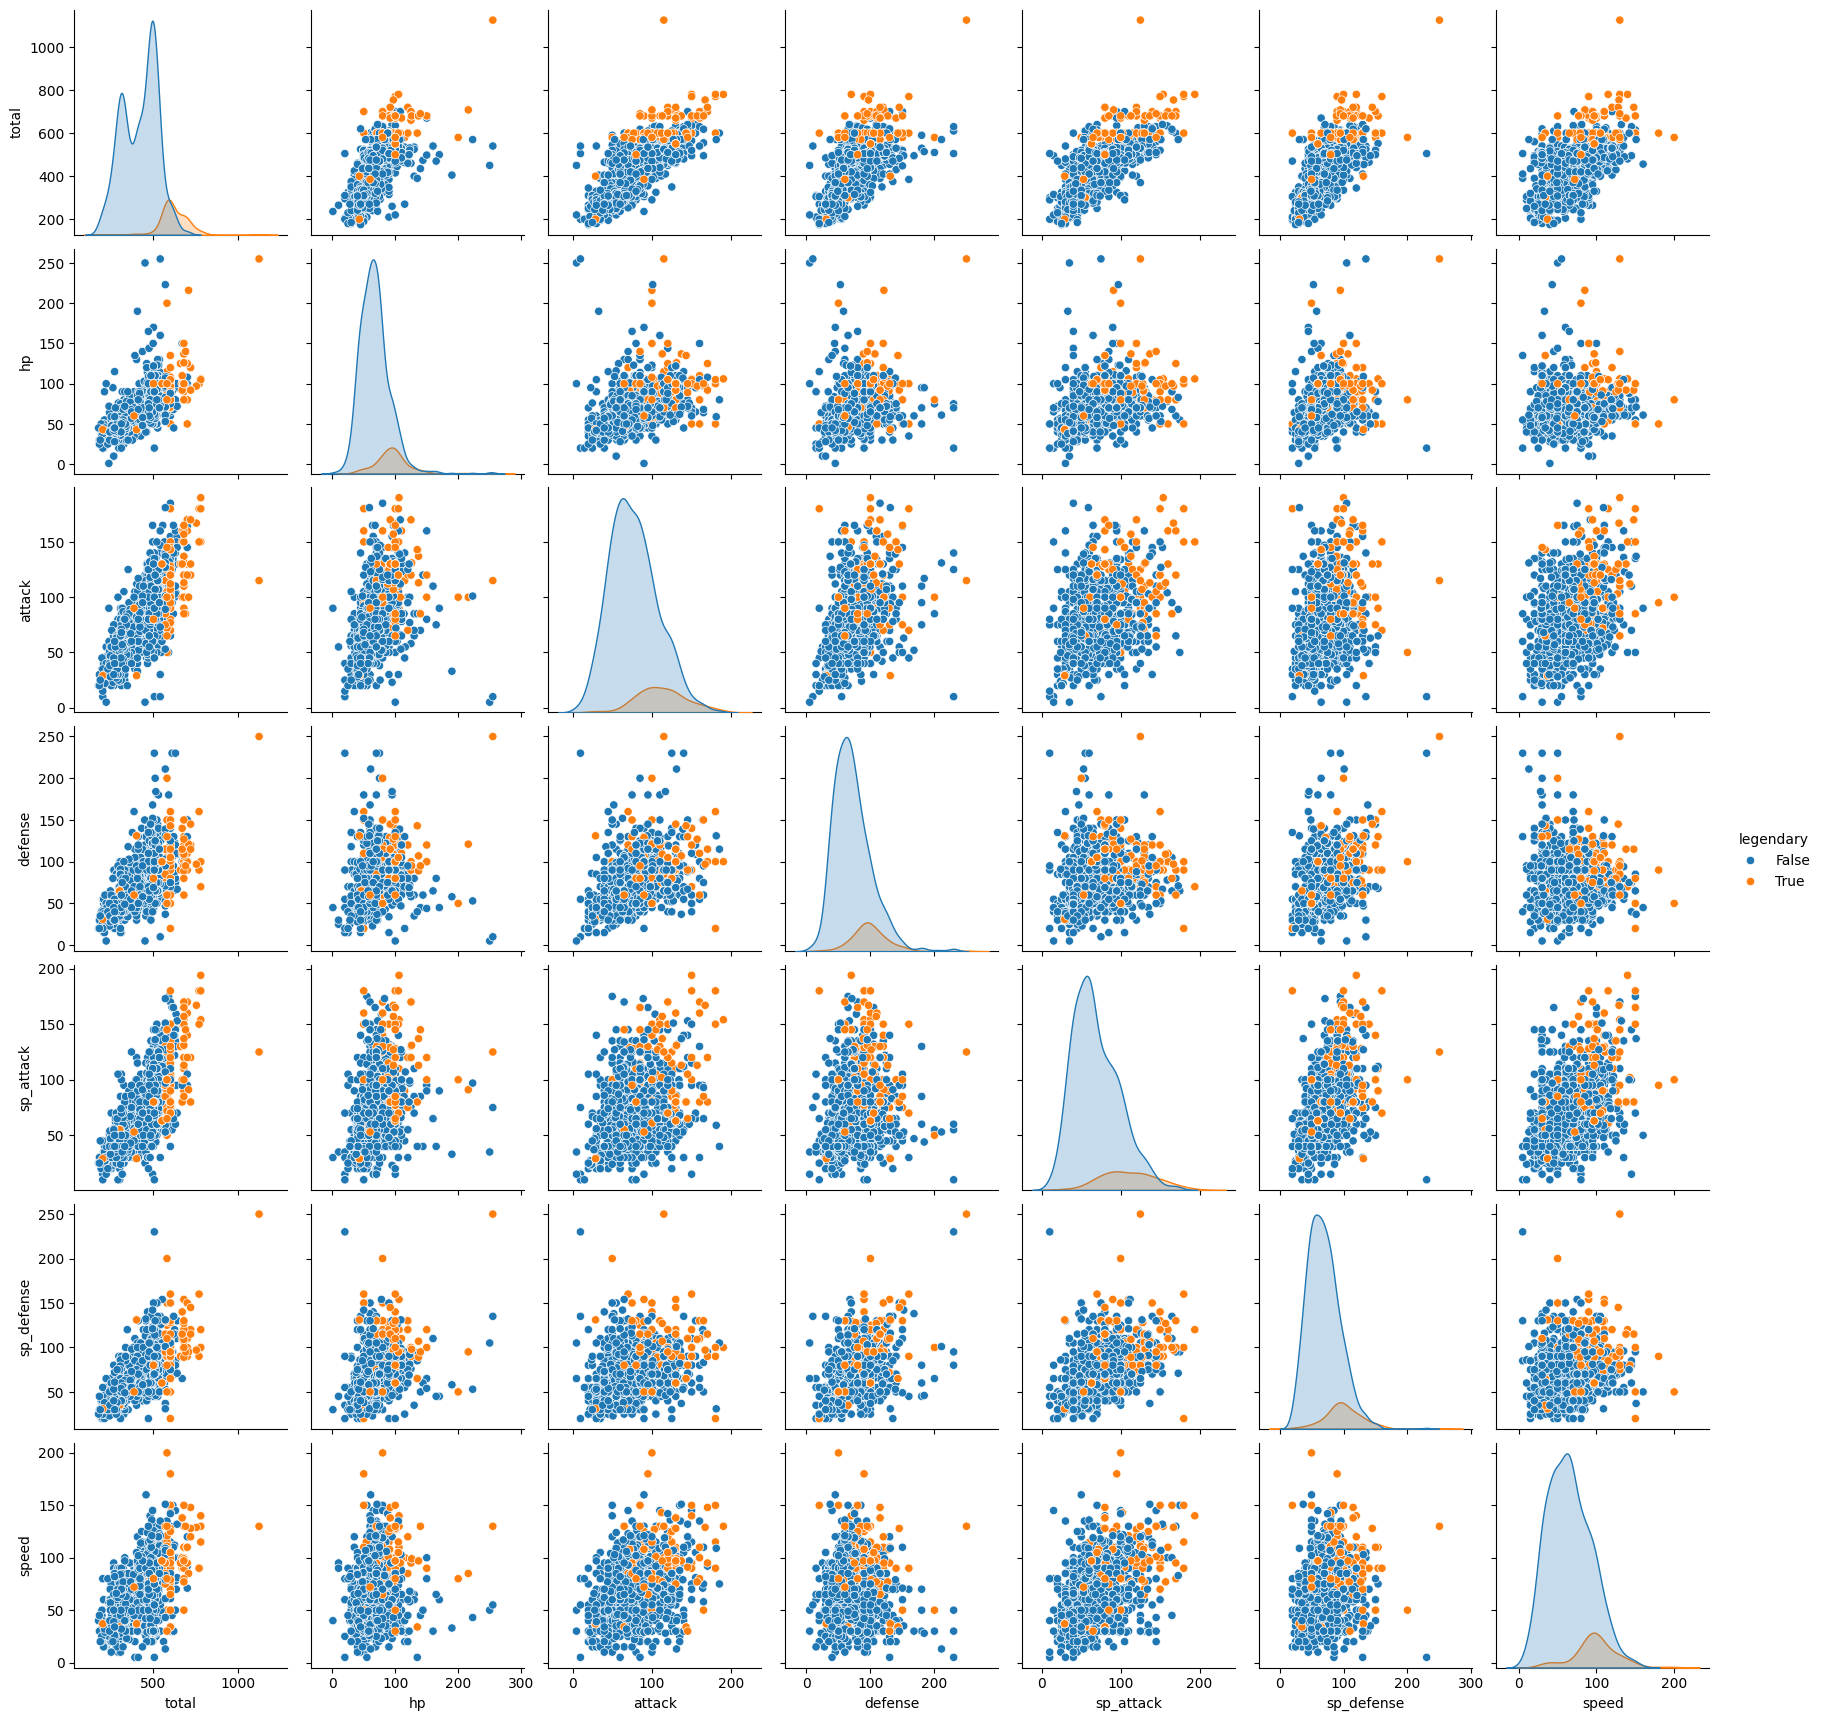

In [16]:
sns.pairplot(data=dataset,hue = 'legendary')

# 3. Build Primary Model

In [17]:
X3 = data[["hp", "attack", "defense", "speed","sp_attack","sp_defense"]]

In [18]:
Y3 =data["legendary"]

In [19]:
print(X3.shape)
print(Y3.shape)

(1072, 6)
(1072,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3,random_state=0)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(804, 6)
(804,)
(268, 6)
(268,)


In [22]:
W3 = np.array([0,0,0,0,0,0,0])
X03 = np.ones((len(X_train)))
X3= np.array([X03,X_train.iloc[:,0],X_train.iloc[:,1],X_train.iloc[:,2],X_train.iloc[:,3],X_train.iloc[:,4],X_train.iloc[:,5]]).T
Y3= np. array(Y_train)
print(X3.shape,Y3.shape)

(804, 7) (804,)


# 4. Model Evaluation:

In [23]:
def sigmoid_function_logistic(z):
  return 1 / (1 + np.exp(-z))

In [24]:
def cost_function_logistic(yp,y):
  m = len(y)
  prediction = sigmoid_function_logistic(X.dot(W3))
  J = 1/m * np.sum(-y*np.log(prediction) - (1-y)*np.log(1-prediction))
  return J

In [25]:
#function to decrease the initial cost of my model
def gradient_descent_logistic(X, y, B, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = sigmoid_function_logistic(X.dot(B))
        error = predictions - y
        gradient = 1/m * X.T.dot(error)
        B = B - alpha * gradient
        J_history[i] = cost_function(X, y, B)

    return B, J_history

In [26]:
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # len of the data in dataset

    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

In [27]:
alpha = 0.001 # learning rate
iterations = 100000 # iterations
new_weight_logistic, J_history_logistic = gradient_descent_logistic(X3, Y3, W3, alpha, iterations)


In [28]:
Y_pred_logistic = (sigmoid_function_logistic(X3.dot(new_weight_logistic)) >= 0.5).astype(int)
print(Y_pred_logistic)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [29]:
Y3.shape,Y_pred_logistic.shape

((804,), (804,))

In [30]:
Y_pred_same_shape = Y_pred_logistic[0:Y_test.shape[0]]

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [32]:
Y_test_binary = np.where(Y_test >= 0.5 ,1 ,0)
cm = confusion_matrix(Y_test_binary,Y_pred_same_shape)
cm

array([[239,   0],
       [ 29,   0]])

Text(0.5, 1.0, 'Confusion Matrix')

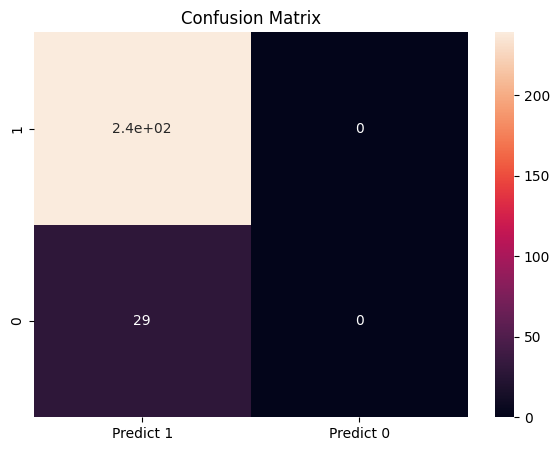

In [33]:
df_cm = pd.DataFrame(cm, index= [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True)
plt.title("Confusion Matrix")

In [34]:
print(classification_report(Y_test,Y_pred_same_shape))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94       239
        True       0.00      0.00      0.00        29

    accuracy                           0.89       268
   macro avg       0.45      0.50      0.47       268
weighted avg       0.80      0.89      0.84       268



# 5. Dimensionality Reduction:

In [35]:
X3_pca = np.array([X03,X_train.iloc[:,0],X_train.iloc[:,1],X_train.iloc[:,2],X_train.iloc[:,3]],X_train.iloc[:,4]).T
#standardization
std_X3_pca = (X3_pca - X3_pca.mean())/X3_pca.std()

In [36]:
from sklearn.decomposition import PCA
pca_logistic = PCA(n_components=3)
pca_logistic.fit(std_X3_pca)

PCA(n_components=3)

In [37]:
X3_pca = pca_logistic.transform(std_X3_pca)

In [38]:
x0_pca = np.ones(len(std_X3_pca[:, 0]))
X3_after_pca = np.array([x0_pca,X3_pca[:, 0], X3_pca[:, 1], X3_pca[:, 2]]).T
w3_after_pca = np.array([0,0,0,0])
Y3_after_pca = np.array(Y_train)

In [39]:
print(X3_after_pca.shape)
print(Y3_after_pca.shape)
print(w3_after_pca.shape)

(804, 4)
(804,)
(4,)


In [40]:
alpha = 0.001 # learing rate
iterations = 100000 # loop limit
new_weight_after_pca_logistic, J_history_after_pca_logistic = gradient_descent_logistic(X3_after_pca, Y3_after_pca,w3_after_pca, alpha, iterations)

In [41]:
Y_pred_after_pca_logistic = (sigmoid_function_logistic(X3_after_pca.dot(new_weight_after_pca_logistic)) >= 0.5).astype(int)
print(Y_pred_after_pca_logistic)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 

In [42]:
Y_pred_after_pca_logistic=Y_pred_after_pca_logistic[0:Y_test.shape[0]]

In [43]:
Y_test_binary_pca = np.where(Y_test >= 0.5 ,1 ,0)
cm_pca = confusion_matrix(Y_test_binary_pca,Y_pred_after_pca_logistic)
cm_pca

array([[232,   7],
       [ 26,   3]])

Text(0.5, 1.0, 'Confusion Matrix')

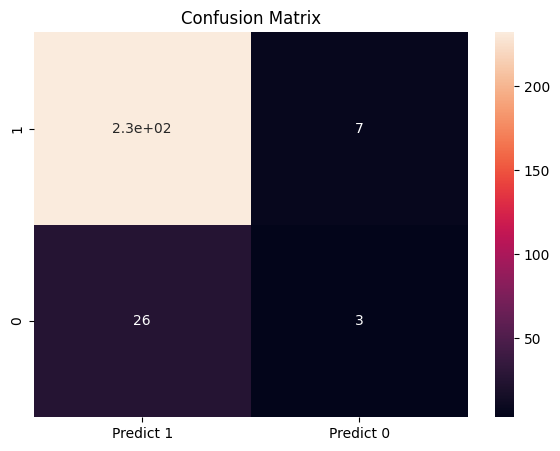

In [44]:
df_cm_pca = pd.DataFrame(cm_pca, index= [i for i in ['1','0']],
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_pca,annot=True)
plt.title("Confusion Matrix")

In [45]:
Y_pred_same_shape_pca_logistic = Y_pred_after_pca_logistic[0:Y_test.shape[0]]

In [46]:
print(classification_report(Y_test,Y_pred_same_shape_pca_logistic))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93       239
        True       0.30      0.10      0.15        29

    accuracy                           0.88       268
   macro avg       0.60      0.54      0.54       268
weighted avg       0.83      0.88      0.85       268



# 6. Conclusion:

Accuracy before PCA: 0.54
Accuracy after PCA: 0.88

Thus, by taking a handful amount of principal components from all of the data, we can produce a model which is more accurate in nature and can provide predictions with higher correctness